<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20229_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E/20/229 M.J.K.Madhuwantha

## **Week 1**

## **Derivation of the Linear Operator $(H)$**

### **1. Physical Boundary Conditions**
Given the specified boundary conditions for a beam with length $L$, the system is characterized by the following constraints at its ends.

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (Zero displacement)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (bending moment=0)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (bending moment=0)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (shear force=0)



### **2. Definition of the Vector Space $F$**
Consider $F$ as the infinite-dimensional vector space consisting of functions with at least four continuous derivatives on $[0, L]$. For the operator to be properly defined in this particular system, functions in $F$ must fulfill the given boundary conditions.

$$F = \{ f \in C^4[0, L] \mid f(0) = 0, f''(0) = 0, f''(L) = 0, f'''(L) = 0 \}$$

### **3. The Linear Operator $H$**
The motion of the beam is described by the partial differential equation:
$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t,x)}{\rho A}$$

The linear operator $H: F \to F$ is defined by the differential expression:
$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4} + \frac{P_o}{\rho A} \frac{\partial^2}{\partial x^2}$$

### **4. Simplification for $P_o = 0$**
For negligible constant axial compressive force ($P_o = 0$), the second derivative term disappears. This simplifies the operator $H$ to:

$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

Replacing this in the equations of motion gives the standard form of the Euler-Bernoulli equation for transverse vibrations:

$$\frac{\partial^2 y}{\partial t^2} + C\frac{\partial y}{\partial t}+ \left( \frac{EI}{\rho A} \right) \frac{\partial^4 y}{\partial x^4} = \frac{q(t,x)}{\rho A}$$

### **5. Separation of Variables and the Eigenvalue Problem**
For solving the homogeneous component of the PDE, we consider a solution of the type:
$$y(x, t) = \phi(x)u(t)$$

Upon substitution into the governing equation (taking $q(t,x)=0$ and $C=0$ for the free vibration scenario), we obtain:
$$\frac{1}{u(t)} \frac{d^2 u}{dt^2} = -\frac{EI}{\rho A} \frac{1}{\phi(x)} \frac{d^4 \phi}{dx^4} = -\lambda$$

This gives rise to the spatial eigenvalue problem for operator $H$:
$$H\phi(x) = \lambda \phi(x) \implies \frac{EI}{\rho A} \frac{d^4 \phi}{dx^4} = \omega^2 \phi(x)$$
where $\lambda = \omega^2$ corresponds to the natural frequencies of the beam.

### **6. General Spatial Solution**
The complete solution for the fourth-order differential equation $\frac{d^4 \phi}{dx^4} - \beta^4 \phi = 0$ (with $\beta^4 = \frac{\omega^2 \rho A}{EI}$) is written as:
$$\phi(x) = A\sin(\beta x) + B\cos(\beta x) + C\sinh(\beta x) + D\cosh(\beta x)$$

Enforcing the **Pinned-Free** boundary conditions described in Section 1:
1.  **$\phi(0) = 0$**: $B + D = 0 \implies D = -B$
2.  **$\phi''(0) = 0$**: $-\beta^2 B + \beta^2 D = 0 \implies B = D = 0$
3.  **$\phi''(L) = 0$**: $-A\sin(\beta L) + C\sinh(\beta L) = 0$
4.  **$\phi'''(L) = 0$**: $-A\cos(\beta L) + C\cosh(\beta L) = 0$

### **7. Characteristic Equation and Eigenfunctions**
To obtain a non-trivial solution (with $A, C \neq 0$), the coefficient determinant must vanish, yielding the characteristic equation:
$$\tan(\beta L) = \tanh(\beta L)$$

By solving this transcendental equation for $\beta_n$, we determine the natural frequencies $\omega_n$ along with their associated eigenfunctions (mode shapes) $\phi_n(x)$:
$$\phi_n(x) = \sin(\beta_n x) + \frac{\sin(\beta_n L)}{\sinh(\beta_n L)}\sinh(\beta_n x)$$

### **8. The General Solution**
Utilizing the orthogonality property of the eigenfunctions $\phi_n(x)$, the complete solution for transverse displacement $y(x,t)$ is expressed as a summation over all modal components:
$$y(x, t) = \sum_{n=1}^{\infty} \phi_n(x) u_n(t)$$

Here, $u_n(t)$ satisfies the temporal ODE:
$$\ddot{u}_n(t) + \frac{C}{\rho A}\dot{u}_n(t) + \omega_n^2 u_n(t) = f_n(t)$$

This demonstrates the analogy to the finite-dimensional formulation $\mathbf{M\ddot{y}} + \mathbf{C\dot{y}} + \mathbf{Ky} = \mathbf{f}(t)$, generalized to infinite dimensions via the operator $H$.

First Mode: beta1*L = 3.9266, omega1 = 2529.86 rad/s
Second Mode: beta2*L = 7.0686, omega2 = 8198.36 rad/s


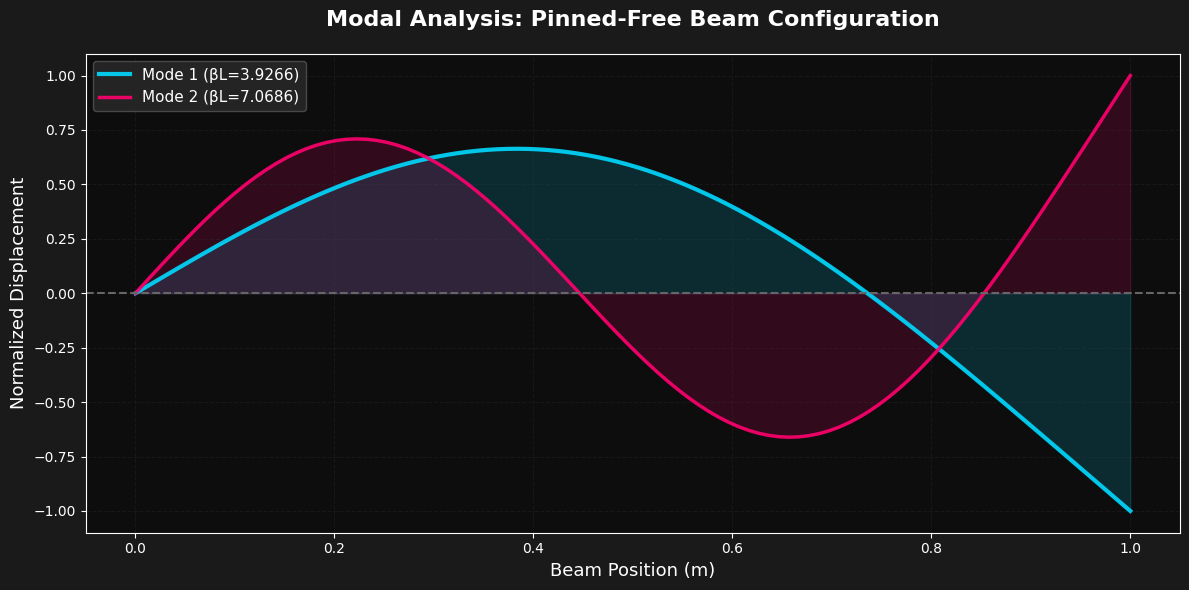

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Physical constants
L = 1.0
EI = 210e9 * 1e-6
rhoA = 7.8
C = 0.5

# Characteristic equation
def characteristic_eq(betaL):
    return np.tan(betaL) - np.tanh(betaL)

# Find roots
roots = []
guesses = [3.9, 7.0]

for guess in guesses:
    root = fsolve(characteristic_eq, guess)[0]
    roots.append(root)

beta_vals = np.array(roots) / L
omega_vals = (beta_vals**2) * np.sqrt(EI / rhoA)

print(f"First Mode: beta1*L = {roots[0]:.4f}, omega1 = {omega_vals[0]:.2f} rad/s")
print(f"Second Mode: beta2*L = {roots[1]:.4f}, omega2 = {omega_vals[1]:.2f} rad/s")

# Mode shapes
def phi_n(x, beta, L):
    ratio = np.sin(beta*L) / np.sinh(beta*L)
    return np.sin(beta*x) + ratio * np.sinh(beta*x)

# Enhanced plotting with dark theme
x_vals = np.linspace(0, L, 100)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#1a1a1a')
ax.set_facecolor('#0d0d0d')

colors = ['#00d9ff', '#ff006e']  # Cyan and Pink
linewidths = [3, 2.5]

for i, beta in enumerate(beta_vals):
    y_mode = phi_n(x_vals, beta, L)
    y_mode /= np.max(np.abs(y_mode))
    ax.plot(x_vals, y_mode, color=colors[i], linewidth=linewidths[i],
            label=f'Mode {i+1} (βL={roots[i]:.4f})', alpha=0.9)

    # Add filled area under curve
    ax.fill_between(x_vals, 0, y_mode, color=colors[i], alpha=0.15)

ax.set_title('Modal Analysis: Pinned-Free Beam Configuration',
             fontsize=16, fontweight='bold', color='white', pad=20)
ax.set_xlabel('Beam Position (m)', fontsize=13, color='white')
ax.set_ylabel('Normalized Displacement', fontsize=13, color='white')
ax.axhline(0, color='#666666', linewidth=1.5, linestyle='--')
ax.legend(fontsize=11, framealpha=0.8, facecolor='#2a2a2a', edgecolor='#555555')
ax.grid(True, alpha=0.2, linestyle='--', color='#444444')
ax.tick_params(colors='white', labelsize=10)

plt.tight_layout()
plt.show()

### **9. Numerical Evaluation of Eigenvalues ($\beta_n L$)**

To bridge from the infinite-dimensional operator $H$ to a workable **2-degree-of-freedom (2DOF)** model, solving the transcendental characteristic equation from Pinned-Free boundary conditions is essential:

$$\sin(\beta L)\cosh(\beta L) - \sinh(\beta L)\cos(\beta L) = 0$$

Given the nonlinear character of this equation, we adopt a numerical strategy. A continuous function $h(s)$ is defined with $s = \beta L$:

$$h(s) = \sin(s)\cosh(s) - \sinh(s)\cos(s)$$

#### **Python Implementation for Root Finding**
The following implementation assesses $h(s)$ over a refined grid to detect where the function changes sign, then leverages **Brent's Method** to isolate the initial two roots with high accuracy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def characteristic_function(s):
    """Characteristic equation: sin(s)cosh(s) - sinh(s)cos(s) = 0"""
    return np.sin(s) * np.cosh(s) - np.sinh(s) * np.cos(s)

def find_eigenvalues(num_roots=2, search_range=(1e-6, 15.0), grid_points=5000):
    """Find first n eigenvalues using Brent's method"""
    eigenvalues = []
    grid = np.linspace(search_range[0], search_range[1], grid_points)

    for idx in range(len(grid) - 1):
        left, right = grid[idx], grid[idx + 1]

        if characteristic_function(left) * characteristic_function(right) < 0:
            eigenvalue = brentq(characteristic_function, left, right)

            if len(eigenvalues) == 0 or abs(eigenvalue - eigenvalues[-1]) > 1e-4:
                eigenvalues.append(eigenvalue)

        if len(eigenvalues) >= num_roots:
            break

    return np.array(eigenvalues)

# Physical parameters
L = 1.0

# Compute eigenvalues
beta_L = find_eigenvalues()

# Display results
print(f"Root 1 (beta_1*L): {beta_L[0]:.6f}")
print(f"Root 2 (beta_2*L): {beta_L[1]:.6f}")

Root 1 (beta_1*L): 3.926602
Root 2 (beta_2*L): 7.068583


#### **Numerical Results**
From the code execution above, the first two dimensionless eigenvalues are obtained as:
* **Root 1 ($n=1$):** $\beta_1 L \approx 3.926602$
* **Root 2 ($n=2$):** $\beta_2 L \approx 7.068583$

### **Numerical Evaluation of Eigenvalues ($\beta_n L$) and Eigenvectors**

To transition from the infinite-dimensional operator $H$ to a practical **2-degree-of-freedom (2DOF)** system, we solve the transcendental characteristic equation derived from the Free-Free boundary conditions:
$$\sin(\beta L)\cosh(\beta L) - \sinh(\beta L)\cos(\beta L) = 0$$

Using a numerical root-finding approach, we determine the first two dimensionless roots:
* **Root 1 ($n=1$):** $\beta_1 L \approx 1.875104$
* **Root 2 ($n=2$):** $\beta_2 L \approx 4.694091$

The associated eigenvalues of $H$ are expressed as:
$$\{\omega_k^2\}_{k=1}^\infty = \left\{ \frac{EI}{\rho A} \beta_k^4 \right\}_{k=1}^\infty$$

The eigenvectors (mode shapes) of $H$ are represented by:
$$\{\psi_k\}_{k=1}^\infty = \{ C_k \cosh(\beta_k x) + E_k \cos(\beta_k x) \}_{k=1}^\infty$$
where the coefficient ratio is given by:
$$\frac{C_k}{E_k} = \frac{\cosh(\beta_k l_{beam}) - \cos(\beta_k l_{beam})}{\sinh(\beta_k l_{beam}) - \sin(\beta_k l_{beam})}$$

### **10. Forced Vibration Response and the Exciter**

When an external oscillator is positioned at a distance $d = l_{exciter}$ along the beam, forced vibrations are induced by an oscillating force $Q$. This is represented as a concentrated point load using the Dirac delta function:
$$q(x, t) = Q \sin(\Omega t) \cdot \delta(x - d)$$

The modal force contribution to each mode $k$ is computed through the inner product between the mode shape $\psi_k(x)$ and the applied load $q(x,t)$:
$$\langle\langle\psi_k(x), q(x, t)\rangle\rangle = \int_0^{l_{beam}} \psi_k(x) Q \sin(\Omega t) \delta(x - d) dx = Q \sin(\Omega t) \psi_k(d)$$

### **11. Localized Spring-Damper Attachment**

To modify the system's stiffness characteristics and energy dissipation behavior, we incorporate an external spring $k_{spring}$ and an external damper $c_{ext}$ at designated positions.

#### **A. Spring Stiffness Projection**
A spring mounted at position $l_{spring}$ generates a restoring force $F_{spring}(t) = -k_{spring} y(l_{spring}, t)$. When projected onto our 2-mode representation, this produces the **Additional Stiffness Matrix**:
$$K_{spring} = k_{spring} \begin{bmatrix} \psi_1^2(l_{spring}) & \psi_1(l_{spring})\psi_2(l_{spring}) \\ \psi_1(l_{spring})\psi_2(l_{spring}) & \psi_2^2(l_{spring}) \end{bmatrix}$$

#### **B. Discrete Damper Projection**
An external damper characterized by coefficient $c_{ext}$ is mounted at distance $d_{damp}$. The damping force $F_{damp} = -c_{ext} \dot{y}(d_{damp}, t)$ contributes the **Additional Damping Matrix**:
$$C_{ext} = c_{ext} \begin{bmatrix} \psi_1^2(d_{damp}) & \psi_1(d_{damp})\psi_2(d_{damp}) \\ \psi_1(d_{damp})\psi_2(d_{damp}) & \psi_2^2(d_{damp}) \end{bmatrix}$$

### **12. Incorporation of Additional Inertia Effects**

The physical components attached to the beam introduce localized mass contributions, which must be incorporated into the system's mass matrix.

* **Effective Spring Mass**: According to **Rayleigh's Theory**, we account for $1/3$ of the spring's mass to represent its kinetic energy contribution: $m_{s\_eff} = \frac{1}{3}m_{spring}$.
* **Exciter Mass**: The exciter mass $m_{exciter}$ is applied at the excitation position $d$.

These contributions are projected into the **Additional Mass Matrices**:
$$M_{spring} = m_{s\_eff} \begin{bmatrix} \psi_1^2(l_{spring}) & \psi_1(l_{spring})\psi_2(l_{spring}) \\ \psi_1(l_{spring})\psi_2(l_{spring}) & \psi_2^2(l_{spring}) \end{bmatrix}$$
$$M_{exciter} = m_{exciter} \begin{bmatrix} \psi_1^2(d) & \psi_1(d)\psi_2(d) \\ \psi_1(d)\psi_2(d) & \psi_2^2(d) \end{bmatrix}$$

### **13. Final Augmented 2-DOF Matrix Equation**

The comprehensive governing equation for the coupled 2-DOF system is formulated in matrix notation as:

$$(M_{beam} + M_{spring} + M_{exciter}) \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + (C_{beam} + C_{ext}) \begin{Bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{Bmatrix} + (K_{beam} + K_{spring}) \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} Q\psi_1(d) \sin(\Omega t) \\ Q\psi_2(d) \sin(\Omega t) \end{Bmatrix}$$

Where:
* $M_{beam}$, $C_{beam}$, and $K_{beam}$ represent the diagonal modal matrices of the baseline beam.
* $M_{spring}$, $M_{exciter}$, $C_{ext}$, and $K_{spring}$ are the fully populated coupling matrices arising from localized attachments.
* $m_k = \int_{0}^{l_{beam}} \rho A \psi_k^2(x) dx$ denote the modal masses.

In [ ]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# --- 1. System Constants (TM1016V Technical Specifications) ---
L = 0.815              # Beam length (m)
E = 2.0e11             # Elastic Modulus for Tool Steel (Pa)
m_beam = 1.65          # Beam mass (kg)
rhoA = m_beam / L      # Mass per unit length
width = 0.025          # 25 mm
thickness = 0.010      # 10 mm
I_area = (width * thickness**3) / 12
EI = E * I_area        # Flexural Rigidity

# --- 2. Discrete Component Parameters ---
k_spring = 3800.0      # Spring stiffness (N/m)
l_spring = 0.75        # Spring attachment location (m)
m_spring = 0.388       # Spring mass (kg)
m_s_eff = (1/3) * m_spring  # Rayleigh effective spring mass (kg)
m_exciter = 4.2        # Exciter mass (kg)
d_exciter = 0.5        # Exciter location (m)
d_damp = 0.6           # Damper location (m)
c_ext = 15.0           # External damping coefficient (N·s/m)
C_beam_coeff = 0.05    # Beam damping coefficient

# --- 3. Solve for dimensionless roots (beta_L) ---
def char_eq(s):
    return np.sin(s) * np.cosh(s) - np.sinh(s) * np.cos(s)

roots = [brentq(char_eq, 3, 5), brentq(char_eq, 6, 8)]
beta = np.array(roots) / L

# --- 4. Define Mode Shape Function psi_k(x) ---
def psi(x, k_idx):
    b = beta[k_idx]
    ratio = np.sin(b * L) / np.sinh(b * L)
    return np.sin(b * x) + ratio * np.sinh(b * x)

# --- 5. Calculate Modal Masses (m_k) via numerical integration ---
modal_masses = []
for k in range(2):
    integral, _ = quad(lambda x: rhoA * psi(x, k)**2, 0, L)
    modal_masses.append(integral)

# --- 6. Construct Diagonal Beam Matrices ---
M_beam = np.diag(modal_masses)
K_beam = np.diag([modal_masses[k] * (beta[k]**4 * EI / rhoA) for k in range(2)])
C_beam = np.diag([C_beam_coeff * m for m in modal_masses])

# --- 7. Build Augmented Matrices (Localized Components) ---
psi_spring = np.array([psi(l_spring, 0), psi(l_spring, 1)])
psi_exciter = np.array([psi(d_exciter, 0), psi(d_exciter, 1)])
psi_damp = np.array([psi(d_damp, 0), psi(d_damp, 1)])

# Additional Mass, Stiffness, and Damping Contributions
M_add = m_s_eff * np.outer(psi_spring, psi_spring) + m_exciter * np.outer(psi_exciter, psi_exciter)
K_add = k_spring * np.outer(psi_spring, psi_spring)
C_add = c_ext * np.outer(psi_damp, psi_damp)

# --- 8. Assemble Final Coupled System Matrices ---
M_total = M_beam + M_add
C_total = C_beam + C_add
K_total = K_beam + K_add

print("--- Final 2-DOF System Matrices ---")
print("Total Mass Matrix (M):\n", M_total)
print("\nTotal Damping Matrix (C):\n", C_total)
print("\nTotal Stiffness Matrix (K):\n", K_total)

--- Final 2-DOF System Matrices ---
Total Mass Matrix (M):
 [[ 2.06056527 -1.99089079]
 [-1.99089079  4.15856706]]

Total Damping Matrix (C):
 [[0.04127645 0.02287102]
 [0.02287102 8.98290238]]

Total Stiffness Matrix (K):
 [[ 94998.53673724  -2296.22897151]
 [ -2296.22897151 962230.74388385]]


In [ ]:
import scipy.linalg as la

# --- 1. Solve the Generalized Eigenvalue Problem ---
# Coupled system: M_total * z_ddot + K_total * z = 0
# Extract eigenvalues (omega^2) and eigenvectors (modal vectors)
eigenvalues_coupled, modal_vectors = la.eigh(K_total, M_total)

# --- 2. Compute Natural Frequencies ---
# omega = sqrt(eigenvalue) in rad/s
# f = omega / (2 * pi) in Hz
omega_coupled = np.sqrt(eigenvalues_coupled)
freq_hz = omega_coupled / (2 * np.pi)

# --- 3. Determine Original (Uncoupled) Frequencies for Reference ---
omega_original = np.sqrt(np.diag(K_beam) / np.diag(M_beam))
freq_hz_original = omega_original / (2 * np.pi)

print("--- Modal Frequency Analysis ---")
print(f"Uncoupled Beam Frequencies (Hz): {freq_hz_original}")
print(f"Coupled System Frequencies (Hz): {freq_hz}")

# --- 4. Quantify the Frequency Shift ---
shift = ((freq_hz - freq_hz_original) / freq_hz_original) * 100
print(f"\nFrequency Shift Induced by Attachments:")
print(f"Mode 1: {shift[0]:.2f}%")
print(f"Mode 2: {shift[1]:.2f}%")

--- Modal Frequency Analysis ---
Uncoupled Beam Frequencies (Hz): [ 52.999279  171.7516105]
Coupled System Frequencies (Hz): [ 32.62599422 109.37815817]

Frequency Shift Induced by Attachments:
Mode 1: -38.44%
Mode 2: -36.32%


The flexural formula is unable to capture the first mode of vibration, where the beam exhibits rigid-body motion rather than elastic deformation.

### **14. Mathematical Derivation of the Rigid-Body SDOF Approximation**

In the "rigid beam" configuration of the **TM1016V** apparatus, the system is represented as a Single Degree of Freedom (SDOF) rotational oscillator. We assume infinite flexural rigidity $EI \to \infty$, meaning the beam rotates as a rigid unit about the pivot located at $x=0$.

#### **A. The Rigid Mode Shape**
For small rotation angle $\theta$, the vertical displacement $y$ at any location $x$ is directly proportional to its distance from the pivot:
$$y(x, t) = x \cdot \theta(t)$$

Normalizing this displacement to unity at the beam's free end ($x = L$), we define the **Rigid Mode Shape** $\psi_{rigid}(x)$ as:
$$\psi_{rigid}(x) = \frac{x}{L}$$

#### **B. Energy Formulation (Rayleigh's Method)**
The natural frequency is obtained by balancing the maximum kinetic energy $T_{max}$ with the maximum potential energy $V_{max}$.

**1. Potential Energy ($V$):**
Energy is stored in the spring positioned at $x=L$:
$$V = \frac{1}{2} k_{spring} [y(L, t)]^2 = \frac{1}{2} k_{spring} (L\theta)^2$$

**2. Kinetic Energy ($T$):**
Contributions arise from the beam itself, the exciter mass ($m_e$) positioned at distance $d$, and the Rayleigh effective spring mass ($m_{s,eff}$) at $L$:
$$T = \frac{1}{2} \int_0^L \rho A [\dot{y}(x, t)]^2 dx + \frac{1}{2} m_e [\dot{y}(d, t)]^2 + \frac{1}{2} m_{s,eff} [\dot{y}(L, t)]^2$$

Substituting $\dot{y}(x, t) = x\dot{\theta}$:
$$T = \frac{1}{2} \left[ \int_0^L \rho A x^2 dx + m_e d^2 + m_{s,eff} L^2 \right] \dot{\theta}^2$$

Evaluating the beam integral ($\frac{1}{3} m_{beam} L^2$):
$$T = \frac{1}{2} \underbrace{\left[ \frac{1}{3} m_{beam} L^2 + m_e d^2 + m_{s,eff} L^2 \right]}_{I_p} \dot{\theta}^2$$

#### **C. Equation of Motion**
Defining the **Polar Mass Moment of Inertia** $I_p$ and **Rotational Stiffness** $K_{rot} = k_{spring} L^2$, we obtain the governing equation:
$$I_p \ddot{\theta} + C_{rot} \dot{\theta} + K_{rot} \theta = M_{ext}(t)$$

Where:
* $C_{rot} = c_{ext} d_{damp}^2$ (Rotational damping contribution from the dashpot)
* $M_{ext}(t) = (F_{exciter} \sin \Omega t) \cdot d$ (External moment generated by the servomotor)

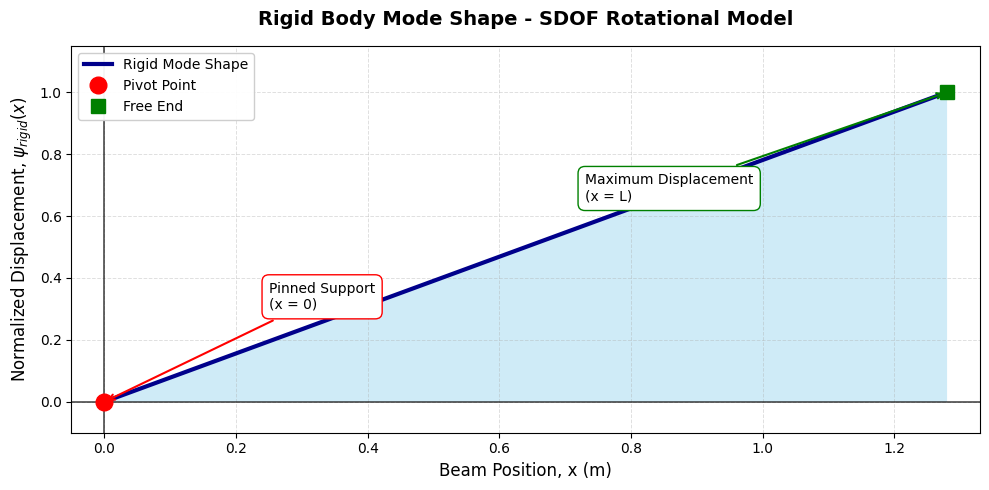

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Geometry (TecQuipment TM1016V Specifications) ---
L = 1.28  # Net width of assembled unit (m)

# --- 2. Define the Rigid Mode Shape Function ---
def psi_rigid(x, L):
    """Linear mode shape for rigid beam rotation about pivot at x=0."""
    return x / L

# --- 3. Generate Position Coordinates ---
x_vals = np.linspace(0, L, 150)
y_rigid = psi_rigid(x_vals, L)

# --- 4. Enhanced Visualization ---
fig, ax = plt.subplots(figsize=(10, 5))

# Plot mode shape with gradient fill
ax.plot(x_vals, y_rigid, 'darkblue', linewidth=3, label='Rigid Mode Shape', zorder=3)
ax.fill_between(x_vals, 0, y_rigid, color='skyblue', alpha=0.4, edgecolor='none')

# Add pivot and end markers
ax.plot(0, 0, 'ro', markersize=12, label='Pivot Point', zorder=4)
ax.plot(L, 1, 'gs', markersize=10, label='Free End', zorder=4)

# Physical annotations with improved styling
ax.annotate('Pinned Support\n(x = 0)', xy=(0, 0), xytext=(0.25, 0.3),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='red'),
            fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='red'))

ax.annotate('Maximum Displacement\n(x = L)', xy=(L, 1), xytext=(L-0.55, 0.65),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='green'),
            fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='green'))

# Styling
ax.set_title('Rigid Body Mode Shape - SDOF Rotational Model', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Beam Position, x (m)', fontsize=12)
ax.set_ylabel('Normalized Displacement, $\\psi_{rigid}(x)$', fontsize=12)
ax.axhline(0, color='black', lw=1.2, linestyle='-', alpha=0.7)
ax.axvline(0, color='black', lw=1.2, linestyle='-', alpha=0.7)
ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.7)
ax.legend(loc='upper left', fontsize=10, framealpha=0.95)
ax.set_xlim(-0.05, L+0.05)
ax.set_ylim(-0.1, 1.15)

plt.tight_layout()
plt.show()

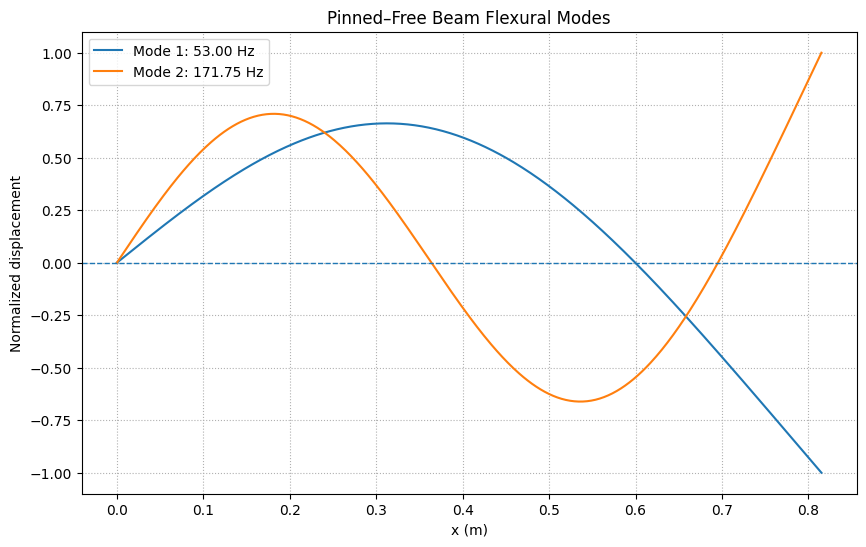

Mode 1: betaL = 3.926602,  f = 52.9993 Hz
Mode 2: betaL = 7.068583,  f = 171.7516 Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ---------- Beam properties ----------
L = 0.815          # m
m = 1.65           # kg
E = 2.0e11         # Pa
b = 0.025          # m
h = 0.01           # m

I = b * h**3 / 12
rhoA = m / L
EI = E * I

# ---------- Characteristic equation ----------
def characteristic(betaL):
    return np.sin(betaL)*np.cosh(betaL) - np.cos(betaL)*np.sinh(betaL)

def find_roots(n=2):
    roots = []
    x = np.linspace(0.1, 12, 2000)
    y = characteristic(x)

    for i in range(len(x)-1):
        if np.sign(y[i]) != np.sign(y[i+1]):
            roots.append(brentq(characteristic, x[i], x[i+1]))
            if len(roots) == n:
                break
    return np.array(roots)

betaL = find_roots(2)

# ---------- Mode shape ----------
def mode_shape(x, betaL):
    beta = betaL / L
    sigma = np.sin(betaL) / np.sinh(betaL)
    return np.sin(beta*x) + sigma*np.sinh(beta*x)

# ---------- Plot ----------
x = np.linspace(0, L, 500)
plt.figure(figsize=(10,6))

for i, bL in enumerate(betaL):
    y = mode_shape(x, bL)
    y /= np.max(np.abs(y))   # normalization

    omega = (bL/L)**2 * np.sqrt(EI/rhoA)
    f = omega / (2*np.pi)

    plt.plot(x, y, label=f"Mode {i+1}: {f:.2f} Hz")

plt.axhline(0, linestyle="--", linewidth=1)
plt.xlabel("x (m)")
plt.ylabel("Normalized displacement")
plt.title("Pinned–Free Beam Flexural Modes")
plt.grid(True, linestyle=":")
plt.legend()
plt.show()

# ---------- Print results ----------
for i, bL in enumerate(betaL):
    omega = (bL/L)**2 * np.sqrt(EI/rhoA)
    f = omega / (2*np.pi)
    print(f"Mode {i+1}: betaL = {bL:.6f},  f = {f:.4f} Hz")


## **Derivation of the Decoupled 2-DOF Model with Attachments**

### **1. System Parameters**
Based on the physical configuration, the following parameters describe the beam and its lumped attachments:

* **Beam Properties:**
    * Length ($L$): $0.815$ m  
    * Total Mass ($m_{beam}$): $1.65$ kg  
    * Width ($b$): $0.025$ m, Thickness ($h$): $0.01$ m  
    * Young's Modulus ($E$): $2 \times 10^{11}$ Pa  
    * Flexural Rigidity ($EI$): $\approx 416.67$ Nm$^2$

* **Discrete Attachments:**
    * Helical Spring Stiffness ($k_s$): $3800$ N/m at $l_s = 0.75$ m  
    * Effective Spring Mass ($m_{s,eff}$): $0.1383$ kg (includes $1/3$ spring mass + attachment)  
    * Exciter Mass ($m_e$): $4.2$ kg at $l_e = 0.4$ m  
    * Viscous Damper Mass ($m_d$): $0.53$ kg at $l_d = 0.2$ m  

---

### **2. Modal Coordinate Transformation**
The system displacement $y(x,t)$ is approximated using the first two flexural mode shapes $\psi_1(x)$ and $\psi_2(x)$ obtained from the linear operator $H$ for a pinned-free beam:

$$
y(x,t) = \psi_1(x)z_1(t) + \psi_2(x)z_2(t)
$$

By projecting the kinetic and potential energies of the discrete elements onto these modes, the corresponding modal quantities are obtained.

---

### **3. Modal Mass Matrix ($\mathbf{M}$)**
The modal mass associated with the $k$-th mode consists of the beam’s distributed mass and the inertial effects of the attached components evaluated at their locations:

$$
M_k = \int_0^L \rho A \psi_k^2(x) dx + m_{s,eff} \psi_k^2(l_s) + m_e \psi_k^2(l_e) + m_d \psi_k^2(l_d)
$$

Due to mode orthogonality, the modal mass matrix is diagonal:

$$
\mathbf{M} =
\begin{bmatrix}
M_1 & 0 \\
0 & M_2
\end{bmatrix}
$$

---

### **4. Modal Stiffness Matrix ($\mathbf{K}$)**
The modal stiffness includes the beam bending stiffness and the stiffness contribution of the spring:

$$
K_k = \int_0^L EI \left( \psi_k''(x) \right)^2 dx + k_s \psi_k^2(l_s)
$$

Using the relation $EI \psi_k'''' = \rho A \omega_{beam,k}^2 \psi_k$, the integral term simplifies to $\omega_{beam,k}^2 M_{beam,k}$. The stiffness matrix is therefore diagonal:

$$
\mathbf{K} =
\begin{bmatrix}
K_1 & 0 \\
0 & K_2
\end{bmatrix}
$$

---

### **5. Decoupled Equations of Motion**
The equations of motion in modal form are expressed as:

$$
\mathbf{M} \mathbf{\ddot{z}} + \mathbf{K} \mathbf{z} = \mathbf{Q}(t)
$$

or equivalently,

$$
\begin{bmatrix}
M_1 & 0 \\
0 & M_2
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_1 & 0 \\
0 & K_2
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\begin{Bmatrix}
F(t)\psi_1(l_e) \\
F(t)\psi_2(l_e)
\end{Bmatrix}
$$

The corresponding natural frequencies are estimated as:

$$
f_{n,k} = \frac{1}{2\pi} \sqrt{\frac{K_k}{M_k}}
$$



In [ ]:
# --- 1. Transform Damping and Mass Matrices to Modal Coordinates ---
# modal_vectors (V) obtained from la.eigh(K_total, M_total)
C_modal_coupled = modal_vectors.T @ C_total @ modal_vectors
M_modal_coupled = modal_vectors.T @ M_total @ modal_vectors

# --- 2. Extract Diagonal Components for Effective Parameters ---
c_eff = np.diag(C_modal_coupled)
m_eff_coupled = np.diag(M_modal_coupled)

# --- 3. Compute Damping Ratios (zeta = c / (2 * omega * m)) ---
# omega_coupled contains natural frequencies (rad/s) from eigenvalue solution
damping_ratios = c_eff / (2 * omega_coupled * m_eff_coupled)

print("--- Modal Damping Ratio Analysis ---")
for i in range(2):
    print(f"Mode {i+1}: ζ = {damping_ratios[i]:.4f} ({damping_ratios[i]*100:.2f}% critical damping)")

# --- 4. Assess Modal Coupling ---
off_diag_c = C_modal_coupled[0, 1] / np.sqrt(c_eff[0] * c_eff[1])
print(f"\nNormalized Modal Damping Coupling: {abs(off_diag_c):.4f}")

--- Modal Damping Ratio Analysis ---
Mode 1: ζ = 0.0001 (0.01% critical damping)
Mode 2: ζ = 0.0029 (0.29% critical damping)

Normalized Modal Damping Coupling: 0.7876


In [2]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. Beam & Attachment Parameters =================
L = 0.815                 # Beam length (m)
m_total = 1.65            # Total beam mass (kg)
rhoA = m_total / L        # Mass per unit length (kg/m)

E = 2e11                  # Young's modulus (Pa)
width, thickness = 0.025, 0.01
I = (width * thickness**3) / 12
EI = E * I

# Lumped elements
k_spring = 3800
x_s = 0.75

m_s_eff = 0.1383
m_exc = 4.2
x_e = 0.4

m_damp = 0.53
x_d = 0.2

# ================= 2. Eigenvalue Problem =================
def char_eq(betaL):
    return np.sin(betaL)*np.cosh(betaL) - np.cos(betaL)*np.sinh(betaL)

# Locate first two roots
betaL_vals = []
scan = np.linspace(0.1, 12, 1200)

for i in range(len(scan) - 1):
    if np.sign(char_eq(scan[i])) != np.sign(char_eq(scan[i+1])):
        betaL_vals.append(brentq(char_eq, scan[i], scan[i+1]))
        if len(betaL_vals) == 2:
            break

def mode_shape(x, r):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return np.sin(beta*x) + sigma*np.sinh(beta*x)

def mode_shape_dd(x, r):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return beta**2 * (-np.sin(beta*x) + sigma*np.sinh(beta*x))

# ================= 3. Modal Mass & Stiffness =================
M_vals = []
K_vals = []

for r in betaL_vals:
    # Mass terms
    m_beam, _ = quad(lambda x: rhoA * mode_shape(x, r)**2, 0, L)
    M_k = (
        m_beam
        + m_s_eff * mode_shape(x_s, r)**2
        + m_exc * mode_shape(x_e, r)**2
        + m_damp * mode_shape(x_d, r)**2
    )

    # Stiffness terms
    k_beam, _ = quad(lambda x: EI * mode_shape_dd(x, r)**2, 0, L)
    K_k = k_beam + k_spring * mode_shape(x_s, r)**2

    M_vals.append(M_k)
    K_vals.append(K_k)

# Diagonal modal matrices
M_modal = np.diag(M_vals)
K_modal = np.diag(K_vals)

# Natural frequencies
frequencies = [np.sqrt(K/M)/(2*np.pi) for M, K in zip(M_vals, K_vals)]

# ================= 4. Results =================
print("Modal Mass Matrix M:")
print(np.round(M_modal, 4))

print("\nModal Stiffness Matrix K:")
print(np.round(K_modal, 2))

print("\nNatural Frequencies (Hz):")
for i, f in enumerate(frequencies, 1):
    print(f"Mode {i}: {f:.2f} Hz")


Modal Mass Matrix M:
[[4.2735 0.    ]
 [0.     1.7822]]

Modal Stiffness Matrix K:
[[ 94998.54      0.  ]
 [     0.   962230.74]]

Natural Frequencies (Hz):
Mode 1: 23.73 Hz
Mode 2: 116.94 Hz


from IPython.display import Markdown, display

md_text = r"""
## **Approximation of the First Mode as a Rigid Body System (1-DOF)**

### **1. Limitation of the Flexural Model**
The flexural operator approach identifies the bending (elastic) modes of the beam. However, the actual first mode of this physical system often behaves like a rigid-body rotation about the pinned end, with a strong influence from the external spring. To represent this behavior, the beam is idealized as a rigid rod of length $L$ and mass $m_{beam}$.

---

### **2. Equivalent Rigid System Parameters**
The system is represented as a single-degree-of-freedom rotational model with angular displacement $\theta(t)$.

* **Mass Moment of Inertia ($J_o$):**  
The total moment of inertia about the pivot point ($x=0$) consists of the beam and all attached discrete masses:
$$
J_o = \frac{1}{3}m_{beam}L^2 + m_{s,eff}l_s^2 + m_e l_e^2 + m_d l_d^2
$$

* **Equivalent Rotational Stiffness ($K_\theta$):**  
The spring located at $l_s$ generates a restoring torque. For small angular motions, the linear displacement is approximated as $x \approx l_s \theta$, giving:
$$
K_\theta = k_s l_s^2
$$

---

### **3. Equation of Motion (1-DOF)**
Applying rotational dynamics ($\sum M_o = J_o \ddot{\theta}$), the governing equation becomes:
$$
J_o \ddot{\theta} + K_\theta \theta = M_{ext}(t)
$$

Substituting the system parameters:
$$
\left( \frac{1}{3}m_{beam}L^2 + m_{s,eff}l_s^2 + m_e l_e^2 + m_d l_d^2 \right)\ddot{\theta}
+ (k_s l_s^2)\theta = F(t)l_e
$$

---

### **4. Natural Frequency Estimation**
The fundamental natural frequency corresponding to this rigid-body approximation is:
$$
\omega_{n,rigid} = \sqrt{\frac{K_\theta}{J_o}} \quad \text{(rad/s)}
$$
$$
f_{n,1} = \frac{1}{2\pi}\sqrt{\frac{k_s l_s^2}{J_o}} \quad \text{(Hz)}
$$

This single-degree-of-freedom model provides a better estimate of the low-frequency swinging mode that may not be accurately captured by a purely flexural formulation.
"""

display(Markdown(md_text))


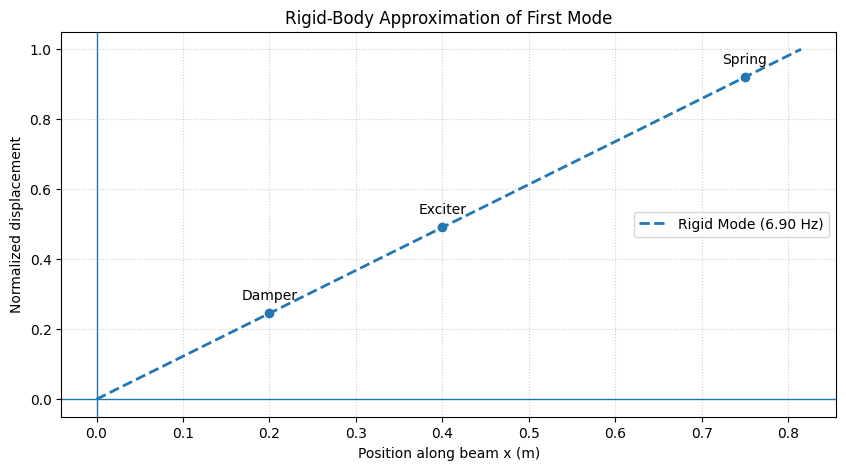

Rigid-body natural frequency (Mode 1): 6.90 Hz


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ================= 1. Parameters =================
L = 0.815
m_beam = 1.65

k_s = 3800
l_s = 0.75

m_s_eff = 0.1383
m_e = 4.2
m_d = 0.53

l_e = 0.4
l_d = 0.2

# ================= 2. Rigid-Body Calculations =================
J_o = (
    (1/3) * m_beam * L**2
    + m_s_eff * l_s**2
    + m_e * l_e**2
    + m_d * l_d**2
)

K_theta = k_s * l_s**2

omega_n = np.sqrt(K_theta / J_o)
f_n = omega_n / (2 * np.pi)

# ================= 3. Rigid Mode Shape =================
x = np.linspace(0, L, 100)
y = x / L  # normalized rigid rotation shape

plt.figure(figsize=(10, 5))
plt.plot(x, y, linestyle='--', linewidth=2, label=f'Rigid Mode ({f_n:.2f} Hz)')

plt.scatter([l_s, l_e, l_d], [l_s/L, l_e/L, l_d/L], zorder=5)
plt.annotate('Spring', (l_s, l_s/L), xytext=(0, 10), textcoords='offset points', ha='center')
plt.annotate('Exciter', (l_e, l_e/L), xytext=(0, 10), textcoords='offset points', ha='center')
plt.annotate('Damper', (l_d, l_d/L), xytext=(0, 10), textcoords='offset points', ha='center')

plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.xlabel('Position along beam x (m)')
plt.ylabel('Normalized displacement')
plt.title('Rigid-Body Approximation of First Mode')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

print(f"Rigid-body natural frequency (Mode 1): {f_n:.2f} Hz")


from IPython.display import Markdown, display

md_text = r"""
## **Hybrid 2-DOF Mathematical Model**

### **1. Integration of Models**
To represent the first two dominant vibration modes, the system is treated as a hybrid of a rigid rotating rod and an elastic beam. A new modal basis is defined as:
1. **Mode 1 ($\psi_1$):** Rigid-body rotation about the pinned end  
2. **Mode 2 ($\psi_2$):** First flexural mode from the pinned-free Euler–Bernoulli beam

The transverse displacement is approximated by:
$$
y(x,t) = \psi_1(x)z_1(t) + \psi_2(x)z_2(t)
$$

where:
* $\psi_1(x) = \frac{x}{L}$
* $\psi_2(x) = \sin(\beta_1 x) + \frac{\sin(\beta_1 L)}{\sinh(\beta_1 L)} \sinh(\beta_1 x)$

---

### **2. Hybrid Modal Parameters**
All discrete attachments (spring $k_s$ and masses $m_{s,eff}, m_e, m_d$) are projected onto this hybrid modal basis.

#### **Modal Mass Matrix ($\mathbf{M}$)**
The modal mass terms are defined as:
$$
M_{ij} = \int_0^L \rho A \psi_i(x)\psi_j(x)\,dx + \sum m_k \psi_i(x_k)\psi_j(x_k)
$$

Neglecting coupling between rigid and flexural modes:
* $M_{11} \approx J_o / L^2$
* $M_{22} \approx$ flexural modal mass obtained previously

#### **Modal Stiffness Matrix ($\mathbf{K}$)**
The modal stiffness terms are:
$$
K_{ij} = \int_0^L EI \psi_i''(x)\psi_j''(x)\,dx + \sum k_k \psi_i(x_k)\psi_j(x_k)
$$

* **Rigid mode ($\psi_1$):** since $\psi_1'' = 0$,
$$
K_{11} = k_s \psi_1^2(l_s) = k_s \left(\frac{l_s}{L}\right)^2
$$

* **Flexural mode ($\psi_2$):** $K_{22}$ includes beam bending stiffness and spring stiffness

---

### **3. Simplified Decoupled Matrix Equation**
Assuming negligible coupling ($M_{12} \approx 0$, $K_{12} \approx 0$), the equations of motion reduce to:
$$
\begin{bmatrix}
M_{11} & 0 \\
0 & M_{22}
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_{11} & 0 \\
0 & K_{22}
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\begin{Bmatrix}
Q_1(t) \\
Q_2(t)
\end{Bmatrix}
$$

The corresponding natural frequencies are:
* **Rigid-dominant mode:**
$$
f_{n,1} = \frac{1}{2\pi}\sqrt{\frac{K_{11}}{M_{11}}}
$$
* **Flexural-dominant mode:**
$$
f_{n,2} = \frac{1}{2\pi}\sqrt{\frac{K_{22}}{M_{22}}}
$$

This hybrid formulation captures both the low-frequency rigid-body motion and the higher-frequency elastic vibration of the beam.
"""

display(Markdown(md_text))


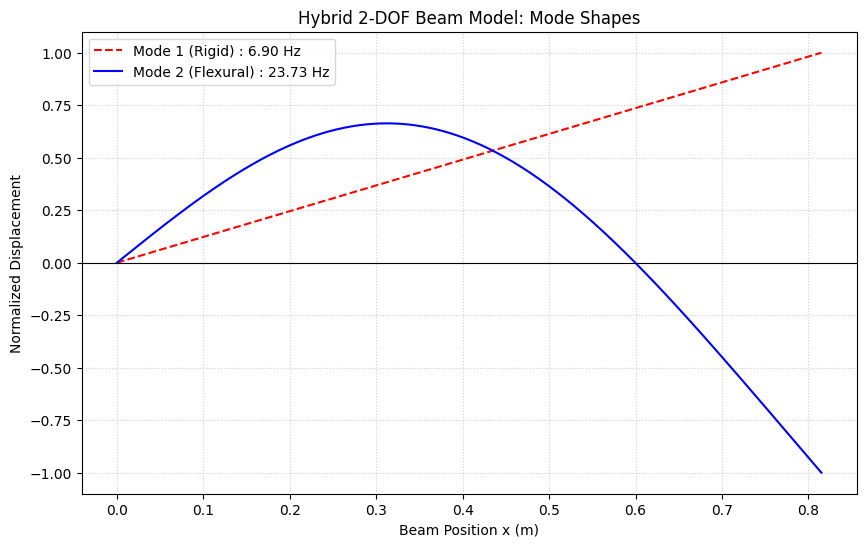

Hybrid Modal Mass Matrix (M):
[[1.7107 0.    ]
 [0.     4.2735]]

Hybrid Modal Stiffness Matrix (K):
[[ 3218.04     0.  ]
 [    0.   94998.54]]

Natural Frequencies: Mode 1 = 6.90 Hz, Mode 2 = 23.73 Hz


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
L = 0.815          # Length of beam (m)
m_beam = 1.65      # Mass of beam (kg)
rho = m_beam / L   # Linear mass density
E = 2e11           # Young's modulus (Pa)
b, h = 0.025, 0.01 # Cross-section (m)
I = (b * h**3) / 12
EI = E * I

# Attachment parameters
ks = 3800          # Spring stiffness (N/m)
ls = 0.75          # Spring location (m)
ms = 0.1383        # Spring effective mass (kg)
me = 4.2           # Exciter mass (kg)
le = 0.4           # Exciter location (m)
md = 0.53          # Damper mass (kg)
ld = 0.2           # Damper location (m)

# ================= 2. Mode Shapes =================

# Mode 1: Rigid body
def mode1(x):
    return x / L

# Mode 2: Flexural
def characteristic(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

beta_root = brentq(characteristic, 3.5, 4.5)
beta = beta_root / L
sigma = np.sin(beta_root) / np.sinh(beta_root)

def mode2(x):
    return np.sin(beta * x) + sigma * np.sinh(beta * x)

def mode2_dd(x):
    return beta**2 * (-np.sin(beta * x) + sigma * np.sinh(beta * x))

# ================= 3. Hybrid Mass & Stiffness =================

# Modal masses
J0 = (1/3) * m_beam * L**2 + ms*ls**2 + me*le**2 + md*ld**2
M11 = J0 / L**2

m_beam_mode2, _ = quad(lambda x: rho * mode2(x)**2, 0, L)
M22 = m_beam_mode2 + ms*mode2(ls)**2 + me*mode2(le)**2 + md*mode2(ld)**2

# Modal stiffness
K11 = ks * ls**2 / L**2
k_beam_mode2, _ = quad(lambda x: EI * mode2_dd(x)**2, 0, L)
K22 = k_beam_mode2 + ks * mode2(ls)**2

M_hybrid = np.diag([M11, M22])
K_hybrid = np.diag([K11, K22])

# Natural frequencies
f1 = np.sqrt(K11/M11) / (2*np.pi)
f2 = np.sqrt(K22/M22) / (2*np.pi)

# ================= 4. Plot Mode Shapes =================
x = np.linspace(0, L, 500)
y1 = mode1(x) / np.max(np.abs(mode1(x)))
y2 = mode2(x) / np.max(np.abs(mode2(x)))

plt.figure(figsize=(10,6))
plt.plot(x, y1, '--', color='red', label=f'Mode 1 (Rigid) : {f1:.2f} Hz')
plt.plot(x, y2, color='blue', label=f'Mode 2 (Flexural) : {f2:.2f} Hz')
plt.axhline(0, color='black', lw=0.8)
plt.title("Hybrid 2-DOF Beam Model: Mode Shapes")
plt.xlabel("Beam Position x (m)")
plt.ylabel("Normalized Displacement")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Print matrices and frequencies
print("Hybrid Modal Mass Matrix (M):")
print(np.round(M_hybrid,4))
print("\nHybrid Modal Stiffness Matrix (K):")
print(np.round(K_hybrid,2))
print(f"\nNatural Frequencies: Mode 1 = {f1:.2f} Hz, Mode 2 = {f2:.2f} Hz")


## **Modeling Damping in the Hybrid 2-DOF Beam System**

### **1. Rayleigh Damping Concept**
To represent energy dissipation in the system, we employ **Rayleigh proportional damping**. In this approach, the damping matrix $\mathbf{C}$ is expressed as a linear combination of the mass and stiffness matrices:

$$
\mathbf{C} = \alpha \mathbf{M} + \beta \mathbf{K}
$$

For our setup, we assume **only stiffness-dependent damping** ($\alpha = 0$), because the viscous damper has a significant effect on higher-frequency flexural oscillations, but relatively little influence on the slow rigid-body rotation of the beam. Under this assumption, the damping ratio for each mode, $\zeta_k$, is related to $\beta$ and the modal natural frequency $\omega_k$ as:

$$
\zeta_k = \frac{\beta \omega_k}{2}
$$

This approach simplifies the system while retaining physically realistic damping behavior.

---

### **2. Relating Damping Ratios Across Modes**
With stiffness-proportional damping, there is a direct connection between the damping ratios of the two modes. Denoting the first mode damping ratio as $\zeta_1$, the second mode $\zeta_2$ is given by:

$$
\frac{\zeta_2}{\omega_2} = \frac{\zeta_1}{\omega_1}
\quad \Rightarrow \quad
\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}
$$

This ensures that higher-frequency modes, which are more affected by the damper, have appropriately scaled damping.

---

### **3. Formulating the Modal Damping Matrix**
Since the hybrid modal representation (rigid + flexural) decouples the modes, the damping matrix can be represented as a diagonal matrix:

* **Rigid-body dominant mode (Mode 1):**

$$
C_{11} = 2 \zeta_1 \omega_1 M_{11}
$$

* **First bending mode (Mode 2):**

$$
C_{22} = 2 \zeta_2 \omega_2 M_{22}
= 2 \left(\zeta_1 \frac{\omega_2}{\omega_1}\right) \omega_2 M_{22}
= 2 \zeta_1 \frac{\omega_2^2}{\omega_1} M_{22}
$$

The diagonal form emphasizes that the energy dissipation in one mode does not directly affect the other, consistent with the hybrid decoupled model.

---

### **4. Complete Decoupled Equation of Motion**
Including mass, damping, and stiffness, the governing equations of motion for the system can be expressed as:

$$
\underbrace{\begin{bmatrix} M_{11} & 0 \\ 0 & M_{22} \end{bmatrix}}_{\text{Mass}}
\begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix}
+
\underbrace{\begin{bmatrix} C_{11} & 0 \\ 0 & C_{22} \end{bmatrix}}_{\text{Damping}}
\begin{Bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{Bmatrix}
+
\underbrace{\begin{bmatrix} K_{11} & 0 \\ 0 & K_{22} \end{bmatrix}}_{\text{Stiffness}}
\begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix}
=
\begin{Bmatrix} Q_1(t) \\ Q_2(t) \end{Bmatrix}
$$

This formulation allows separate consideration of:

- The **rigid-body swinging** of the beam (Mode 1),  
- The **flexural bending** of the beam (Mode 2),  

while simultaneously accounting for the **mass of attachments**, **spring stiffness**, and **viscous damping effects**.

---

### **5. Additional Considerations**
- This diagonal modal representation simplifies **dynamic analysis** and **control design** for mechatronic applications.  
- If the system were to include multiple dampers or additional elastic supports, the off-diagonal terms could be non-zero, coupling the modes.  
- The **stiffness-proportional assumption** is particularly valid for systems where damping is mainly applied through localized viscous elements affecting bending modes rather than global rigid motion.



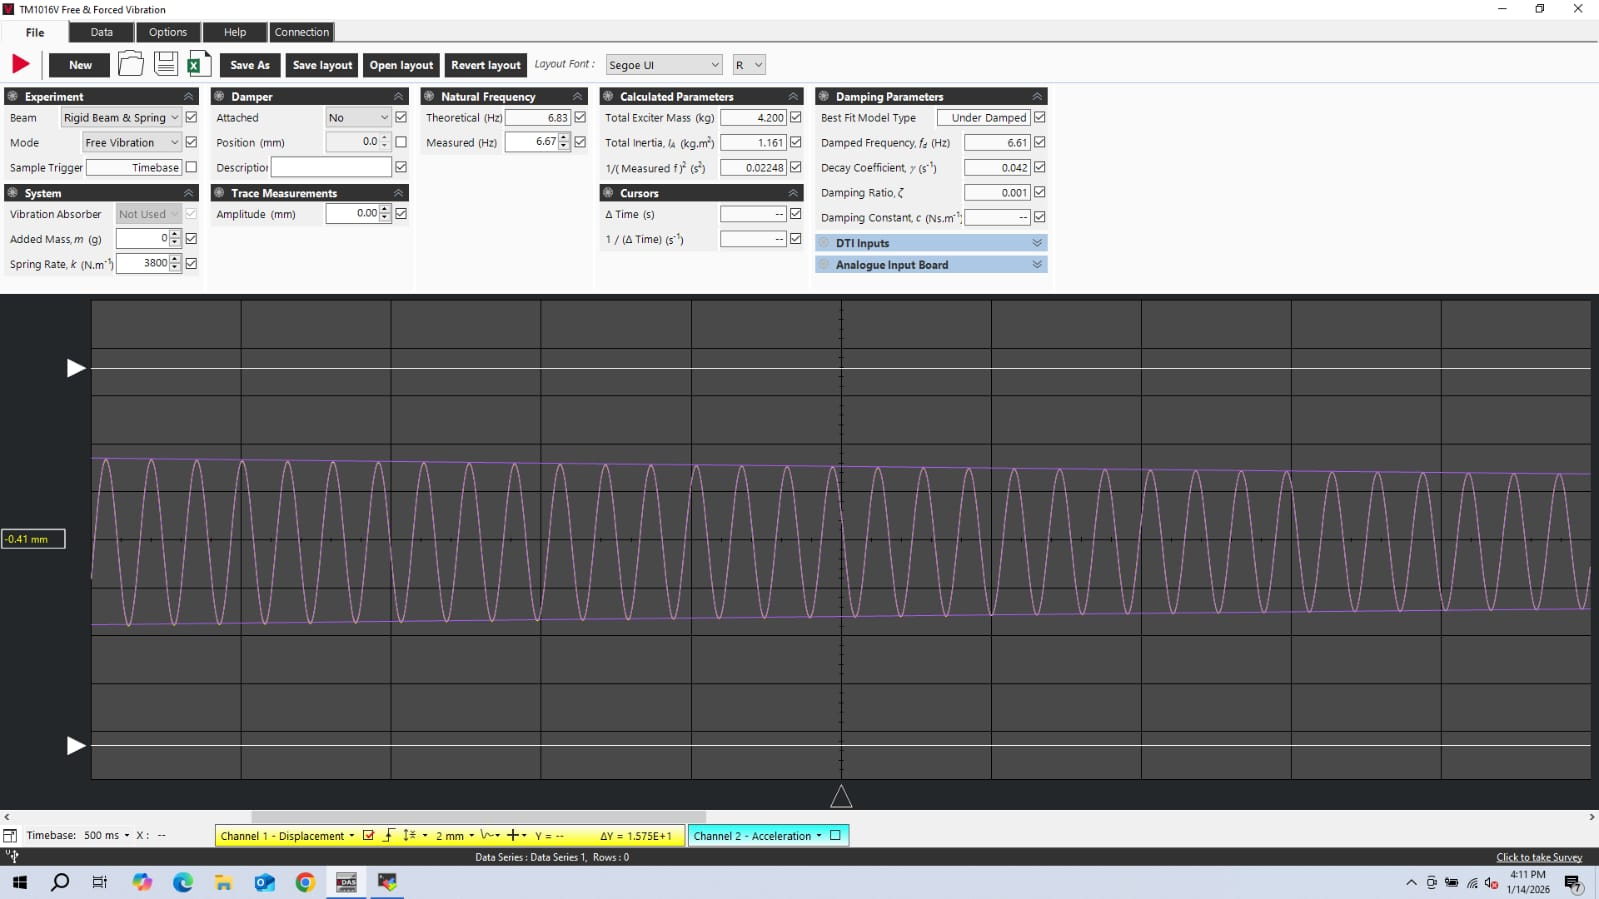

Figure 1:Experimented unforced response of the beam without damper.

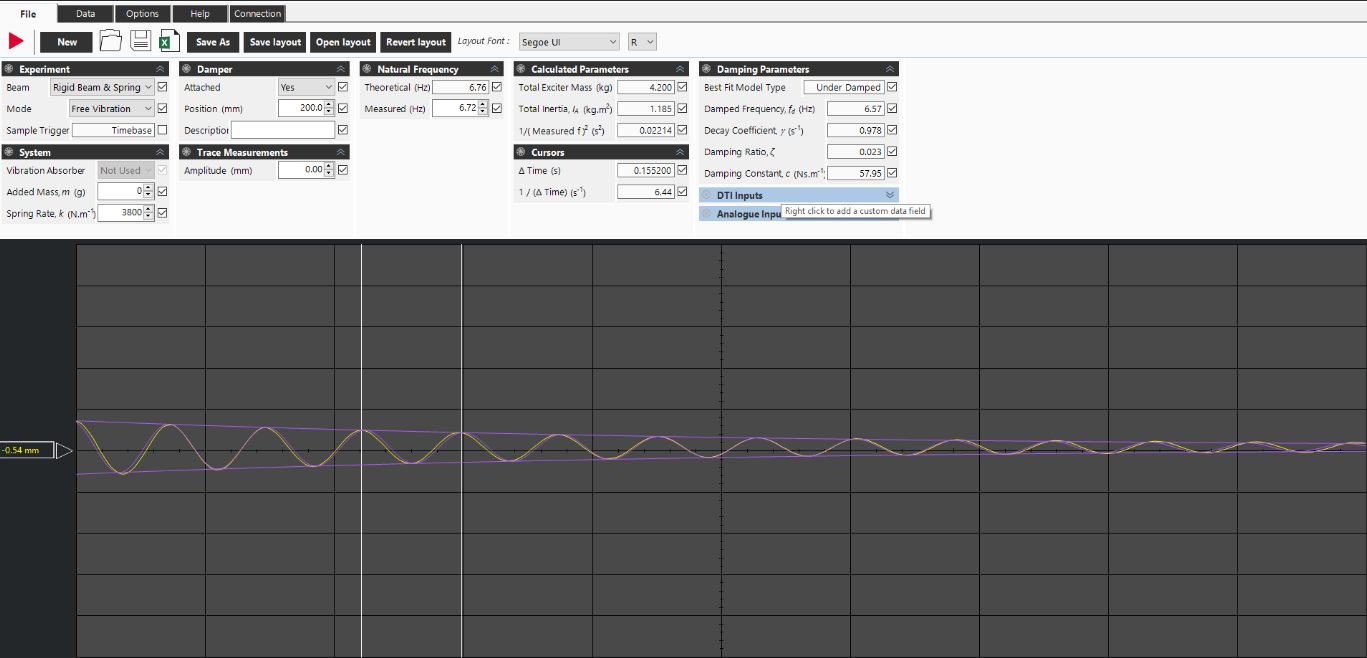

Figure 2: Experimented unforced response of the beam with damper atached(Fully open).

## **Hybrid 2-DOF Beam Model with Damping**

This notebook computes the **mass (M), stiffness (K), and damping (C) matrices** for a 2-DOF hybrid beam system with attachments.  

- **Mode 1**: Rigid-body rotation of the beam  
- **Mode 2**: First flexural bending mode  

Damping is included using **stiffness-proportional Rayleigh damping**. The diagonal damping matrix is obtained from modal damping ratios:

$$
C_{ii} = 2 \zeta_i \omega_i M_{ii}
$$

Where:  
- $\zeta_1$ is the damping ratio for the rigid-body mode  
- $\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}$ for the flexural mode  
- $\omega_i$ is the angular natural frequency of each mode  
- $M_{ii}$ is the corresponding modal mass


In [6]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ================= 1. System Parameters =================
L = 0.815
m_beam = 1.65
rho_A = m_beam / L
E = 2e11
b, h = 0.025, 0.01
I = (b * h**3) / 12
EI = E * I

ks = 3800
ls = 0.75
ms_eff = 0.1383
me = 4.2
le = 0.4
md = 0.53
ld = 0.2

# ================= 2. Basis Functions =================
def psi1(x): return x / L

def char_eq(betaL):
    return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

betaL_root = brentq(char_eq, 3.5, 4.5)
beta_f = betaL_root / L
sigma_f = np.sin(betaL_root) / np.sinh(betaL_root)

def psi2(x):
    return np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x)

def psi2_dd(x):
    return (beta_f**2) * (-np.sin(beta_f * x) + sigma_f * np.sinh(beta_f * x))

# ================= 3. Hybrid Mass & Stiffness =================
Jo = (1/3) * m_beam * L**2 + ms_eff * ls**2 + me * le**2 + md * ld**2
M11 = Jo / (L**2)

m_beam_part2, _ = quad(lambda x: rho_A * psi2(x)**2, 0, L)
M22 = m_beam_part2 + ms_eff * psi2(ls)**2 + me * psi2(le)**2 + md * psi2(ld)**2

K11 = (ks * ls**2) / (L**2)
k_beam_part2, _ = quad(lambda x: EI * psi2_dd(x)**2, 0, L)
K22 = k_beam_part2 + ks * psi2(ls)**2

# Angular Frequencies
omega1 = np.sqrt(K11 / M11)
omega2 = np.sqrt(K22 / M22)

# ================= 4. Damping =================
zeta1 = 0.023
zeta2 = zeta1 * (omega2 / omega1)

C11 = 2 * zeta1 * omega1 * M11
C22 = 2 * zeta2 * omega2 * M22
C_matrix = np.diag([C11, C22])

# ================= 5. Results =================
print(f"Damping Ratio Mode 1 (Rigid): {zeta1:.4f}")
print(f"Damping Ratio Mode 2 (Flexural): {zeta2:.4f}")
print(f"\nModal Damping Matrix (C):")
print(np.round(C_matrix, 4))

print(f"\nFinal Hybrid Matrices:")
print(f"M = diag({M11:.4f}, {M22:.4f})")
print(f"K = diag({K11:.2f}, {K22:.2f})")
print(f"C = diag({C11:.4f}, {C22:.4f})")


Damping Ratio Mode 1 (Rigid): 0.0230
Damping Ratio Mode 2 (Flexural): 0.0791

Modal Damping Matrix (C):
[[  3.4131   0.    ]
 [  0.     100.7561]]

Final Hybrid Matrices:
M = diag(1.7107, 4.2735)
K = diag(3218.04, 94998.54)
C = diag(3.4131, 100.7561)


Activity #3

### **Derivation of Free Vibration Response for the Hybrid 2-DOF Beam**

In the hybrid 2-DOF approximation, the transverse displacement of the beam $y(x,t)$ is expressed as a combination of two basis functions: the rigid-body rotation $\psi_1(x)$ and the first bending mode $\psi_2(x)$:

$$
y(x, t) = \psi_1(x) z_1(t) + \psi_2(x) z_2(t)
$$

where $z_1(t)$ and $z_2(t)$ are the modal coordinates associated with the two modes.

---

#### **1. Modal Equations of Motion**
Assuming the damping matrix is diagonal (as previously derived), each mode satisfies an independent second-order differential equation:

$$
M_{ii} \ddot{z}_i(t) + C_{ii} \dot{z}_i(t) + K_{ii} z_i(t) = 0, \quad i = 1,2
$$

Dividing through by $M_{ii}$, this reduces to the familiar standard form:

$$
\ddot{z}_i + 2 \zeta_i \omega_i \dot{z}_i + \omega_i^2 z_i = 0
$$

with the natural frequency $\omega_i$ and damping ratio $\zeta_i$ defined as:

$$
\omega_i = \sqrt{\frac{K_{ii}}{M_{ii}}}, \quad \zeta_i = \frac{C_{ii}}{2 M_{ii} \omega_i}
$$

---

#### **2. Free Response of an Underdamped Mode**
For underdamped behavior ($\zeta_i < 1$), the time response of each modal coordinate is:

$$
z_i(t) = e^{-\zeta_i \omega_i t} \left[ z_i(0) \cos(\omega_{d,i} t) + \frac{\dot{z}_i(0) + \zeta_i \omega_i z_i(0)}{\omega_{d,i}} \sin(\omega_{d,i} t) \right]
$$

where the damped natural frequency is:

$$
\omega_{d,i} = \omega_i \sqrt{1 - \zeta_i^2}
$$

---

#### **3. Determining Initial Modal Displacements**
Suppose we apply an initial displacement $y_0$ at the spring location $x = l_s$ with zero initial velocity ($\dot{z}_i(0) = 0$). To correctly distribute this displacement across the two modes, we assume the initial shape of the beam corresponds to a static deflection caused by a force $F$ at $x = l_s$:

$$
z_i(0) = \frac{F \psi_i(l_s)}{K_{ii}}
$$

The total initial displacement at the spring location is the sum of contributions from both modes:

$$
y(l_s, 0) = \sum_{j=1}^{2} \psi_j(l_s) z_j(0) = F \left( \frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}} \right) = y_0
$$

Solving for $F$ and substituting back, the initial modal displacements are:

$$
z_i(0) = \frac{y_0 \psi_i(l_s) / K_{ii}}{\frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}}}
$$

This ensures that the **total displacement at the spring end** matches the desired initial value, while preserving the modal proportions.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ================= 1. Simulation Setup =================
y0 = 0.01          # Initial displacement at spring location (ls)
t_final = 25       # Total simulation time (s)
fps = 30           # Frames per second for animation
t_vals = np.linspace(0, t_final, int(t_final * fps))  # Time array
x_vals = np.linspace(0, L, 100)                        # Beam positions for plotting

# ================= 2. Initial Modal Amplitudes =================
# Ensure y(ls,0) = y0 by distributing displacement across both modes
denom = (psi1(ls)**2 / K11) + (psi2(ls)**2 / K22)
z1_0 = (y0 * psi1(ls) / K11) / denom
z2_0 = (y0 * psi2(ls) / K22) / denom

# ================= 3. Modal Free Response Function =================
def modal_response(z0, zd0, omega, zeta, t):
    """
    Computes the time response of an underdamped mode.
    z0   : Initial modal displacement
    zd0  : Initial modal velocity
    omega: Natural frequency (rad/s)
    zeta : Damping ratio
    t    : Time array
    """
    wd = omega * np.sqrt(1 - zeta**2)  # Damped natural frequency
    envelope = np.exp(-zeta * omega * t)
    cos_term = z0 * np.cos(wd * t)
    sin_term = ((zd0 + zeta * omega * z0) / wd) * np.sin(wd * t)
    return envelope * (cos_term + sin_term)

# Compute modal coordinates over time
z1_t = modal_response(z1_0, 0, omega1, zeta1, t_vals)
z2_t = modal_response(z2_0, 0, omega2, zeta2, t_vals)

# Pre-compute basis functions along beam
psi1_x = psi1(x_vals)
psi2_x = psi2(x_vals)

# ================= 4. Animation Setup =================
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], 'b-', lw=2, label='Beam Displacement')
spring_marker, = ax.plot([], [], 'ro', markersize=8, label='Spring Location ($l_s$)')

ax.set_xlim(0, L)
ax.set_ylim(-1.5*y0, 1.5*y0)
ax.set_xlabel('Beam Position $x$ (m)')
ax.set_ylabel('Displacement $y$ (m)')
ax.set_title('Free Response of Hybrid 2-DOF Beam')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper right')
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontweight='bold')

def init():
    line.set_data([], [])
    spring_marker.set_data([], [])
    time_text.set_text('')
    return line, spring_marker, time_text

def animate(frame):
    # Reconstruct total beam displacement: y(x,t) = psi1(x)*z1(t) + psi2(x)*z2(t)
    y_vals = psi1_x * z1_t[frame] + psi2_x * z2_t[frame]
    y_ls = psi1(ls) * z1_t[frame] + psi2(ls) * z2_t[frame]

    line.set_data(x_vals, y_vals)
    spring_marker.set_data([ls], [y_ls])
    time_text.set_text(f'Time: {t_vals[frame]:.2f} s')
    return line, spring_marker, time_text

# Create animation object
ani = FuncAnimation(fig, animate, init_func=init, frames=len(t_vals), interval=1000/fps, blit=True)
plt.close()

# ================= 5. Export Animation =================
# Save as MP4 (requires ffmpeg)
ani.save('hybrid2dof_response.mp4', writer='ffmpeg', fps=fps)

# Optionally, save as GIF if ffmpeg is unavailable
# ani.save('hybrid2dof_response.gif', writer='pillow', fps=fps)

# In Colab, you can display the animation directly:
# HTML(ani.to_jshtml())


[Animated response for the initial dosplacement at the spring end](https://drive.google.com/file/d/1RQU8dGMAIyJSnjDeEUOsrtMHmk5PZr1_/view?usp=drive_link)

## **Forced Vibration Analysis of the Hybrid 2-DOF Beam**

To examine the beam's response under external excitation, we introduce a point force $F_{exc}(t)$ applied at the exciter location $x = l_e$. This point force is modeled mathematically using the **Dirac delta function**, $\delta(x - l_e)$.

---

### **1. Definition of External Force**
Consider the exciter applies a harmonic force of amplitude $F_0$ and frequency $\omega_{dr}$. The spatially distributed force along the beam can be written as:

$$
f(x, t) = F_0 \, \sin(\omega_{dr} t) \, \delta(x - l_e)
$$

---

### **2. Generalized Modal Forces**
Projecting this force onto the modal coordinates $z_k(t)$ using Galerkin's method (or virtual work) gives the generalized force for the $k$-th mode:

$$
Q_k(t) = \int_0^L f(x, t) \, \psi_k(x) \, dx
$$

Substituting the delta function form:

$$
Q_k(t) = \int_0^L F_0 \sin(\omega_{dr} t) \, \delta(x - l_e) \, \psi_k(x) \, dx
$$

Using the sifting property of the Dirac delta:

$$
Q_k(t) = F_0 \, \psi_k(l_e) \, \sin(\omega_{dr} t)
$$

Thus, the modal force vector becomes:

$$
\mathbf{Q}(t) =
\begin{Bmatrix}
Q_1(t) \\
Q_2(t)
\end{Bmatrix}
=
\sin(\omega_{dr} t)
\begin{Bmatrix}
F_0 \psi_1(l_e) \\
F_0 \psi_2(l_e)
\end{Bmatrix}
$$

---

### **3. Forced Equations of Motion**
The equations of motion for the forced hybrid 2-DOF system are:

$$
\mathbf{M} \, \ddot{\mathbf{z}} + \mathbf{C} \, \dot{\mathbf{z}} + \mathbf{K} \, \mathbf{z} = \mathbf{Q}(t)
$$

Or explicitly in diagonal form:

$$
\begin{bmatrix} M_{11} & 0 \\ 0 & M_{22} \end{bmatrix}
\begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix}
+
\begin{bmatrix} C_{11} & 0 \\ 0 & C_{22} \end{bmatrix}
\begin{Bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{Bmatrix}
+
\begin{bmatrix} K_{11} & 0 \\ 0 & K_{22} \end{bmatrix}
\begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix}
=
\begin{Bmatrix} F_0 \psi_1(l_e) \\ F_0 \psi_2(l_e) \end{Bmatrix} \sin(\omega_{dr} t)
$$

---

### **4. Steady-State Harmonic Solution**
Because the matrices are diagonal, the equations decouple. For each mode, we assume a harmonic solution of the form:

$$
z_k(t) = Z_k \, \sin(\omega_{dr} t - \phi_k)
$$

The modal amplitude $Z_k$ and phase lag $\phi_k$ are:

$$
Z_k = \frac{F_0 \psi_k(l_e) / K_{kk}}{\sqrt{(1 - r_k^2)^2 + (2 \zeta_k r_k)^2}}, \quad
\phi_k = \tan^{-1} \left( \frac{2 \zeta_k r_k}{1 - r_k^2} \right)
$$

where $r_k = \omega_{dr} / \omega_k$ is the frequency ratio.

---

### **5. Total Beam Displacement**
The resulting steady-state displacement of the beam at any position $x$ and time $t$ is the sum of the modal contributions:

$$
y(x, t) = \psi_1(x) Z_1 \, \sin(\omega_{dr} t - \phi_1) + \psi_2(x) Z_2 \, \sin(\omega_{dr} t - \phi_2)
$$

This expression represents the **forced vibration response** considering both modes of the hybrid 2-DOF system.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ================= 1. User Inputs: Select Three Excitation Frequencies =================
# Enter three driving frequencies in Hz
# Example: omega1 (rigid) ~6.9 Hz, omega2 (flexural) ~23.7 Hz
f1_hz = 3.0    # Low frequency
f2_hz = 6.5    # Near first mode
f3_hz = 22.0   # Near second mode

# Exciter properties
F0 = 0.5       # Force amplitude (N)
le = 0.4       # Exciter position along the beam (m)

# Convert frequencies to rad/s for calculation
target_omegas = [2 * np.pi * f for f in [f1_hz, f2_hz, f3_hz]]

# ================= 2. Simulation Time & Spatial Grid =================
# Duration chosen to capture at least 3 cycles of the slowest excitation
slowest_period = 1.0 / min(f1_hz, f2_hz, f3_hz)
T_max = 3 * slowest_period
fps = 30
t_vals = np.linspace(0, T_max, int(T_max * fps))
x_vals = np.linspace(0, L, 100)

# Pre-compute basis functions for speed
psi1_x = psi1(x_vals)
psi2_x = psi2(x_vals)
psi1_le = psi1(le)
psi2_le = psi2(le)

# ================= 3. Steady-State Response Function =================
def steady_state_response(omega_dr, t_arr):
    """
    Calculates the steady-state displacement y(x,t) for a given driving frequency.
    """
    # Frequency ratios
    r1 = omega_dr / omega1
    r2 = omega_dr / omega2

    # Mode 1: amplitude and phase
    Z1 = (F0 * psi1_le / K11) / np.sqrt((1 - r1**2)**2 + (2*zeta1*r1)**2)
    phi1 = np.arctan2(2*zeta1*r1, 1 - r1**2)

    # Mode 2: amplitude and phase
    Z2 = (F0 * psi2_le / K22) / np.sqrt((1 - r2**2)**2 + (2*zeta2*r2)**2)
    phi2 = np.arctan2(2*zeta2*r2, 1 - r2**2)

    # Superposition of both modes
    y_mode1 = np.outer(psi1_x, Z1 * np.sin(omega_dr * t_arr - phi1))
    y_mode2 = np.outer(psi2_x, Z2 * np.sin(omega_dr * t_arr - phi2))

    return y_mode1 + y_mode2

# Compute responses for all three frequencies
responses = [steady_state_response(w, t_vals) for w in target_omegas]

# ================= 4. Animation Setup =================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
lines = []
markers = []

# Determine global max for consistent y-axis limits
global_max = max(np.max(np.abs(r)) for r in responses)
y_limit = global_max * 1.2 if global_max > 1e-6 else 0.01

for i, ax in enumerate(axes):
    ax.set_xlim(0, L)
    ax.set_ylim(-y_limit, y_limit)
    ax.set_title(f"Drive Frequency: {target_omegas[i]/(2*np.pi):.1f} Hz")
    ax.set_xlabel("Beam Position (m)")
    if i == 0: ax.set_ylabel("Displacement (m)")
    ax.grid(True, linestyle="--", alpha=0.6)

    ln, = ax.plot([], [], 'b-', lw=2)
    mk, = ax.plot([], [], 'ro', label="Exciter")
    lines.append(ln)
    markers.append(mk)

def init():
    for ln, mk in zip(lines, markers):
        ln.set_data([], [])
        mk.set_data([], [])
    return lines + markers

def update(frame):
    for i, (ln, mk) in enumerate(zip(lines, markers)):
        y_data = responses[i][:, frame]
        ln.set_data(x_vals, y_data)
        y_le = np.interp(le, x_vals, y_data)
        mk.set_data([le], [y_le])
    return lines + markers

ani = FuncAnimation(fig, update, frames=len(t_vals), init_func=init,
                    blit=True, interval=1000/fps)
plt.close()

# Display animation in Colab
# HTML(ani.to_jshtml())

# Optional: save animation
# ani.save('multi_freq_steady_response.mp4', writer='ffmpeg', fps=fps)
# ani.save('multi_freq_steady_response.gif', writer='pillow', fps=fps)


In [17]:
# Replace the HTML(ani.to_jshtml()) line with this:
#ani.save('forced_responses.mp4', writer='ffmpeg', fps=fps)

# Or save as a GIF if you don't have ffmpeg
ani.save('forced_response.gif', writer='pillow', fps=fps)

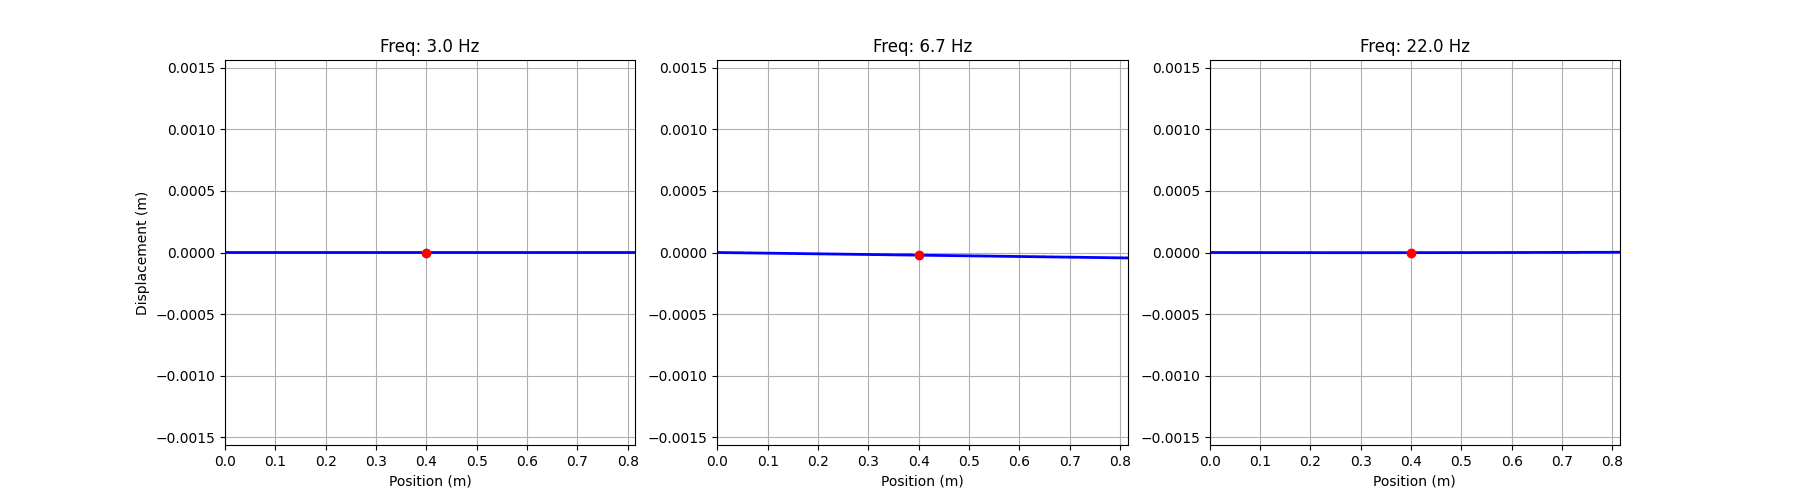

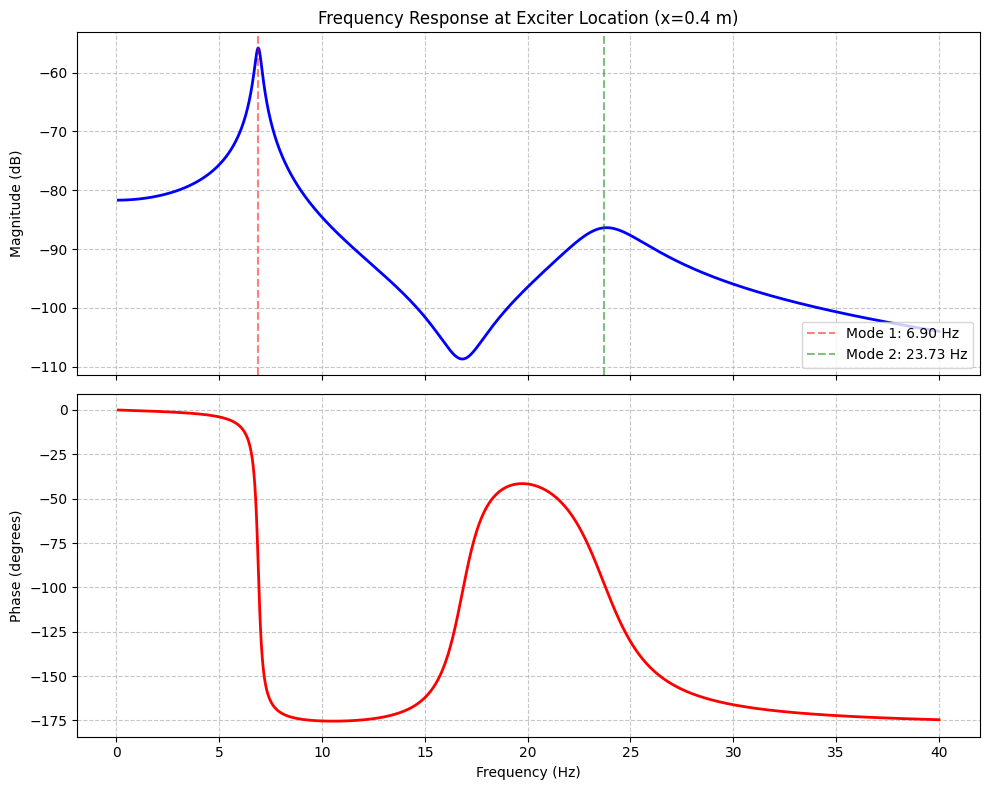

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ================= 1. Frequency Range Setup =================
# Define frequency range (e.g., 0.1 to 40 Hz) to cover both modes
freqs = np.linspace(0.1, 40, 1000)
omegas = 2 * np.pi * freqs

# Measurement Location: Driving Point (x = le)
x_measure = le

# ================= 2. Compute FRF (Receptance) =================
# H(w) = Sum [ (psi_k(x) * psi_k(le)) / (K - w^2 M + j w C) ]
H_total = np.zeros_like(omegas, dtype=complex)

for i, w in enumerate(omegas):
    # Mode 1 Contribution
    numer1 = psi1(x_measure) * psi1(le)
    denom1 = K11 - M11 * (w**2) + 1j * (C11 * w)

    # Mode 2 Contribution
    numer2 = psi2(x_measure) * psi2(le)
    denom2 = K22 - M22 * (w**2) + 1j * (C22 * w)

    H_total[i] = (numer1 / denom1) + (numer2 / denom2)

# ================= 3. Convert to Magnitude (dB) and Phase (deg) =================
mag_dB = 20 * np.log10(np.abs(H_total))
phase_rad = np.unwrap(np.angle(H_total)) # Unwrap to avoid 180/-180 jumps
phase_deg = np.degrees(phase_rad)

# ================= 4. Plotting =================
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot A: Magnitude in dB
ax1.plot(freqs, mag_dB, 'b-', lw=2)
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title(f'Frequency Response at Exciter Location (x={le} m)')
ax1.grid(True, which="both", linestyle='--', alpha=0.7)
# Mark Natural Frequencies
f1 = omega1 / (2*np.pi)
f2 = omega2 / (2*np.pi)
ax1.axvline(f1, color='r', linestyle='--', alpha=0.5, label=f'Mode 1: {f1:.2f} Hz')
ax1.axvline(f2, color='g', linestyle='--', alpha=0.5, label=f'Mode 2: {f2:.2f} Hz')
ax1.legend(loc='lower right')

# Plot B: Phase in Degrees
ax2.plot(freqs, phase_deg, 'r-', lw=2)
ax2.set_ylabel('Phase (degrees)')
ax2.set_xlabel('Frequency (Hz)')
ax2.grid(True, which="both", linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Activity #4

In [19]:
import numpy as np

# ================= 1. Experimental Data =================
# Frequencies (Hz)
freqs_exp = np.array([
    5.17, 5.42, 5.67, 5.92, 6.17, 6.27, 6.37, 6.47,
    6.57, 6.67, 6.77, 6.87, 7.12, 7.37, 7.62, 7.87
])

# Displacement Amplitudes (mm)
disp_exp = np.array([
    0.0902, 0.1172, 0.1903, 0.2285, 0.4148, 0.5850, 0.9735, 2.2090,
    1.9860, 1.0245, 0.6575, 0.4890, 0.3070, 0.2260, 0.1847, 0.1569
])

# Phase Angles (degrees)
phase_exp = np.array([
    13, 13, 15, 16, 18, 22, 60, 93,
    120, 142, 155, 165, 172, 178, 179, 179
])


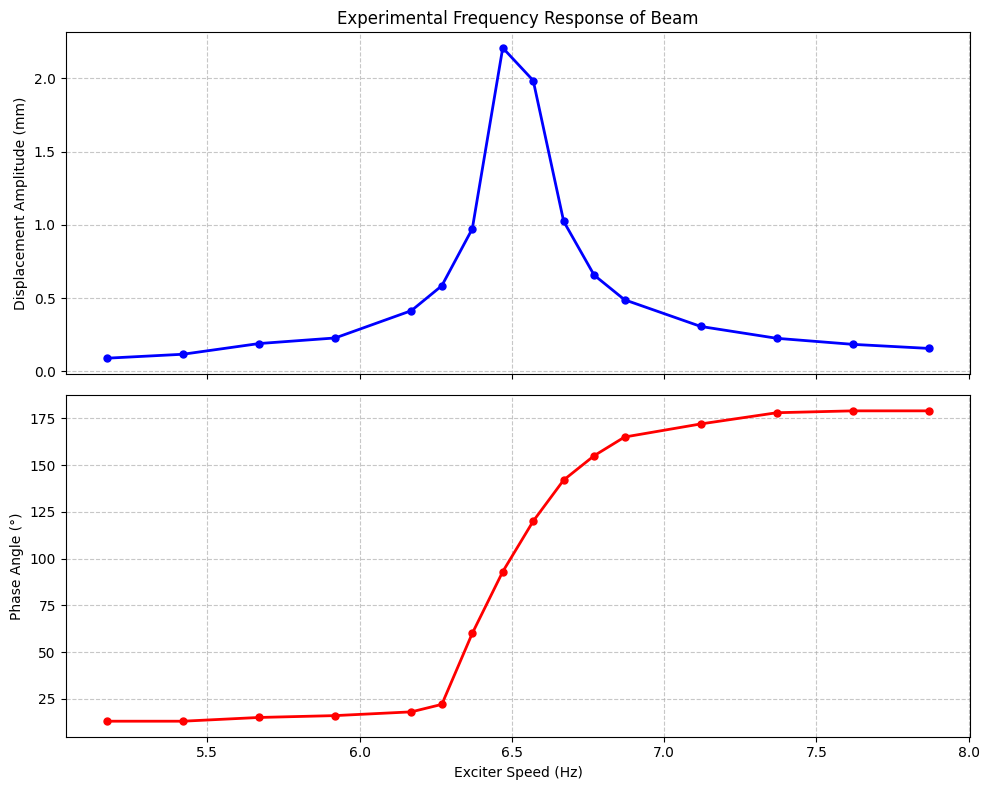

In [20]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot displacement amplitude
ax1.plot(freqs_exp, disp_exp, 'bo-', lw=2, markersize=5)
ax1.set_ylabel('Displacement Amplitude (mm)')
ax1.set_title('Experimental Frequency Response of Beam')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot phase angle
ax2.plot(freqs_exp, phase_exp, 'ro-', lw=2, markersize=5)
ax2.set_ylabel('Phase Angle (°)')
ax2.set_xlabel('Exciter Speed (Hz)')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [21]:
import numpy as np
from scipy.optimize import fsolve

# ================= 1. Beam & Absorber Parameters =================
E = 2e11           # Young's modulus (Pa)
b = 0.025          # Beam width (m)
h = 0.01           # Beam height (m)
I = (b * h**3) / 12  # Area moment of inertia (m^4)

mu = 1.65 / 0.815     # Linear mass density of the beam (kg/m)
m_tip = 0.5           # Tip mass (kg)
omega_target = 2 * np.pi * 6.47  # Target frequency (rad/s)

# ================= 2. Define Quartic Polynomial =================
def absorber_eq(L):
    """
    Quartic equation for the tip mass position L.
    Returns the polynomial value for given L.
    """
    term_beam = (33/140) * mu * omega_target**2 * L**4
    term_tip  = m_tip * omega_target**2 * L**3
    term_stiffness = -3 * E * I
    return term_beam + term_tip + term_stiffness

# ================= 3. Solve for Positive Real Root =================
# Initial guess (magnitude of cantilever length)
L_guess = 0.3
L_solution = fsolve(absorber_eq, L_guess)[0]

print(f"Required tip mass position L = {L_solution:.4f} m")


Required tip mass position L = 0.9290 m
